In [203]:
# import statements

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

# Introduction  

Darren Singh  
Student Number: 216236275  

* The general flow of this project will be outlined below
* Initially the data will be ingested and then viewed (checking for null entries)
* The written answer to each question will appear *before* the code related to that question. The figures relevant to the answer of the question appear below the question
* Firstly, after the data ingestation, the data will be cleaned and thus the written answer to question 3 will be provided first.
* This will be followed by the answer to question 1, and then question 2

In [204]:
# import data, basic stats

### Change path if using it on a different computer ###
data = pd.read_csv("sales_data.csv")

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


,Price,Units Sold
count,945.000000,943.000000
mean,108.628011,10.200424
std,167.350086,3.247589
min,0.190000,2.000000
25%,26.420000,8.000000
50%,64.640000,10.000000
75%,142.310000,12.000000
max,2636.900000,22.000000


# Question 3: Data Cleaning

Before analyses are conducted the data will be cleaned. The rationale for how data cleaning was handled will be explained below.

* Missing Product Data: Any row/record missing the product field should be removed. Since the product name is a string, the product can not be retrieved via imputation. Replacing missing the missing product name with anything could skew the data, as we have no idea what that product could have been. So it is best to remove rows/records that are missing data for the product name. This can be accomplished by using the dropna function, filtering by only the product row.  

* Missing Region Data: Any row/record missing the region field should be removed. This follows from the same reasoning as the product field.   

* Missing Price Data: This is a different case than the above 2. If price data is missing then the price could be replaced by the average price of the product in that region. For example, if product_1 was sold in region_1 for $5 once, and we then have another instance of product_1 being sold in region_1 but the price is unknown, the price will be assumed to be $5, because that is the average price of product_1 in region_1. However, if the product has not been sold in that region before, we do not want to set to average price to 0, or anything for that matter because we have no information to base our decision upon. In that case the entire row/record should be deleted/dropped becuase assigning a value to the price would be making an uninformed decision and may skew the data.    

* Missing Units Sold Data: This case will be handled identically to the Missing Price Data case, the only difference between the averages will be calculated as the average amount of Units Sold of that product in that region, not of the pricing.  

* Missing Sales Date Data: This case never occurs. The given data contains 1050 entries and includes 1050 non-null Sales Date entries.  

A word about Outliers
* The only columns that really contain outliers are the numeric ones, being price and units sold. This can be seen in figures 1 and 2 below.   
* An outlier in price would be a surprisingly large price but this is not data that should be ignored. A high price simply means that a store/region was able to sell the product for a lot of money. This is important data as it speaks to the effectiveness of the store/region. Some of the outliers can be seen in Figure 1 below.     
*An outlier for Units Sold is a surprisingly large amount of units sold but this is not data that should be ignored. A high amount of units sold simply means that a given store/region was able to sell a lot of products. This is significant data regarding the success of a given store/region and should notbe ignored. Some of the outliers can be seen in Figure 2 below.   



In [205]:
# first need to clean the data (Question 3)

# remove rows with missing product or region data
data = data.dropna(subset=['Product','Region'])


# now for cleaning price data

# first grab the entries that are missing price data
price = data['Price'].isna()

# also count how many elements are missing price data
amountNull = data['Price'].isnull().sum()

# then filter out the data records that are missing price info
nullprice = data[price]

# loop through elements missing price data
for i in range(amountNull):
    

    # now iterate through these records with null prices
    product, place, temp, amount, date = nullprice.iloc[i]
    
    # after extracting the product and region, get the average price of the product in that region
    prodRegion = data[(data['Product']==product) & (data['Region']==place)]
    averagePrice = prodRegion['Price'].mean()
    
    # if the average price is nan this likely means that the product was not sold in this region, will drop these records
    if math.isnan(averagePrice) or averagePrice == 0:
        data = data.drop(data.loc[data['Sale Date']==date].index)
        data = data.reset_index(drop=True)
    else:
        # now replace the null entry with this value
        data.loc[data['Sale Date']==date, 'Price']= averagePrice



# now clean units sold, largely the same process as cleaning price data

# first grab the entries that are missing Units Sold data
amountSold = data['Units Sold'].isna()

# also count how many elements are missing price data
amountNull = data['Units Sold'].isnull().sum()

# then filter out the data records that are missing price info
nullAmount= data[amountSold]

# loop through elements missing price data
for i in range(amountNull):
    
    # now iterate through these records with null prices
    product, place, temp, amount, date = nullAmount.iloc[i]
    
    # after extracting the product and region, get the average price of the product in that region
    prodRegion = data[(data['Product']==product) & (data['Region']==place)]
    averageSold = prodRegion['Units Sold'].mean()
    
    # if the average price is nan this likely means that the product was not sold in this region, will drop these records
    if math.isnan(averageSold) or averageSold == 0:
        data = data.drop(data.loc[data['Sale Date']==date].index)
        data = data.reset_index(drop=True)
    else:
        # now replace the null entry with this value
        data.loc[data['Sale Date']==date, 'Units Sold']= averageSold

In [206]:
# verify data cleaning is completed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     813 non-null    object 
 1   Region      813 non-null    object 
 2   Price       813 non-null    float64
 3   Units Sold  813 non-null    float64
 4   Sale Date   813 non-null    object 
dtypes: float64(2), object(3)
memory usage: 31.9+ KB


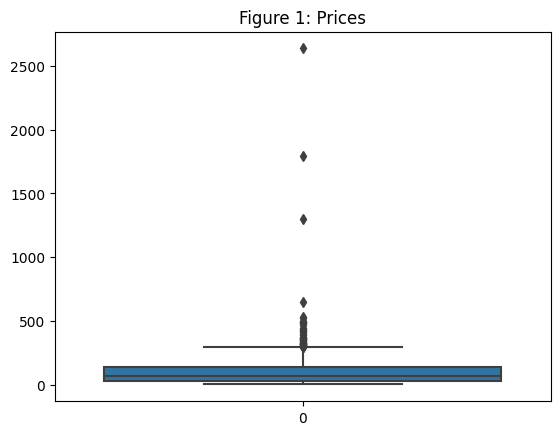

In [207]:
# figure 1

sns.boxplot(data['Price'])
plt.title('Figure 1: Prices')
plt.show()

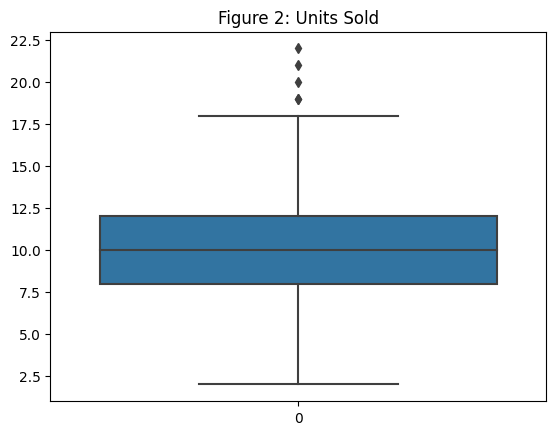

In [208]:
# figure 2

sns.boxplot(data['Units Sold'])
plt.title('Figure 2: Units Sold')
plt.show()

# Question 1: Conclusion about sales performance of various products and regions

General info   
* The general idea behind the data analysis is to consider the regions and products somewhat seperately. Initially an analysis will be conducted on products and regions separately, then they will be explored together later on. See bottom of cell for conclusion.    

* A column entitled *revenue* was added to the dataframe. Revenue was added because it is value of interest and could aid with the analysis. It was calculated as *product price* multiplied by *amount of units sold*    

Speaking about the various regions   

* When looking at the average units sold per region, there is little of interest to note. On average each of the regions sell near the same amount of units, with region 7 selling slightly more than units than the others. This data can be found in *Figure 3* below.    

* Average price per region (*Figure 4*) is a different case, there is more variation between the different regions. On average region 2 has significantly higher prices than its counterparts (the reasons for this will be discussed later on), while regions 3 and 4 have significantly lower prices than the other regions. Region 10 and 8 also have rather high average prices.   

* The total units sold per region (*Figure 5*) tells a slightly different story, there is not much variation between the regions. However, region 5 does have the highest amount of units sold by a noticeable margin, regions 2, 7 and 9 also have more units sold than their counterparts. The remaining regions all have similar amounts of units sold.   

* The average revenue per region (*Figure 6*) does have some variation. On average average region 2 has a significantly higher revenue than its counterparts. Regions 10 and 8 also have high average revenues compared to the others while regions 3 and 4 have a noticeable lower average revenue than their counterparts.   

* The total revenue per region (*Figure 7*) has less variation. Region 5 has the highest total revenue of all the regions, regions 2, 9 and 7 also have high total revenues. Regions 4,6 and 3 have lower total revenues than their counterparts.   

* Notable features:   
  
  * Region 7 has a high amount of units sold on average and in total relative to its counterparts and also has a higher total revenue than its counterparts.    

  * Region 2 has a high price on average, a high amount of units sold in total, a significantly higher average revenue and a high total revenue when compared to its counterparts.   

  * Regions 3 and 4 have significantly lower prices on average, lower average revenue and lower total average revenue than their counterparts.    

Speaking about the various products   

* Average amount of units sold per product (*Figure 8*) shows some variation. Products 11, 18 and 32 have notably high amounts of units sold on average relative to their counterparts. Products 50, 43, 39, 27 and 20 have notably lower amounts of units sold on average relative to their counterparts.    

* Average price per product (*Figure 9*) has a lot of variation. Products 27 and 34 (greatest) have a much higher price on average than their counterparts. Products 24, 35 and 48 have a lower price on average than their counterparts.   

* Total units sold per product (*Figure 10*) also has a lot of variation. Products 24, 4 (greatest) and 43 have large total amounts of units sold relative to their counterparts. Products 18, 47 and 39 have much lower total units sold than their counterparts.   

* Average Revenue per product (*Figure 11*) has some variation. Product 34 has nearly twice the average revenue of its next greatest counterpart, product 27, products 27 and 49 have higher average revenue than the rest of the products. Products 35 and 43 have a notably lower average revenue than their counterparts.    

* Total revenue per product (*Figure 12*) also has some variation. Products 24, 4 (greatest) and 44 have the largest total revenue of all the products. Products 47, 39 and 18 have lower total revenues than their counterparts.    

* Notable features:  

  * Product 50 has a lower amount of units sold on average, a high average price, a high total revenue and an above average total revenue when compared to its counterparts.  

  * Product 43 has a lower amount of units sold on average, a lower average price, a high amount of total units sold, a low average revenue and a high total revenue when compared to its counterparts.   

  * Product 39 has a low amount of units sold on average, a low amount of total units sold and a low total revenue when compared to its counterparts.   

  * Product 27 has a low amount of units sold on average, a high average price, a high total amount of units sold, a high average revenue and a high total revenue when compared to its counterparts.   

  * Product 34 has a high average price, an extremely high average revenue but a near-median total revenue when compared to its counterparts.   

  * Product 24 has a low average price, a high amount of total units sold, a low average revenue and a high total revenue when compared to its counterparts.    

  * Product 35 has a low average price, a low average revenue and a near-median total revenue when compared to its counterparts.   

  * Product 4 has a large amount of total units sold, a low amount of units sold on average, a low average revenue and the greatest total revenue when compared to its counterparts.   

  * Product 18 has a low amount of units sold on average, a low amount of units sold in total and a near-median total revenue when compared to its counterparts.   

  * Product 47 is low performing in all categories when compared to its counterparts.  


Speaking about performance of products per region:   

* Figures 13 - 22 contain this information   

* Region 1: Sold high amounts of products 43 (greatest), 10, 13, 14, 19, 23, 24, 33, 34 and 42. Sold low amounts of products 1, 16, 20, 26, 29, 3, 30, 45, 5, 6 and 7.   

* Region 2: Sold high amounts of products 49 (greatest), 48, 39 and 23. Sold low amounts of products 1, 12, 16, 25, 28, 31, 36, 41 and 6.   

* Region 3: Sold high amounts of products 26 (greatest), 4 (greatest) and 9. Sold low amounts of products 11, 16, 20, 21, 22, 25, 27, 29, 32, 33, 38, 44, 46, 6 and 7.  

* Region 4: Sold high amounts of products 45 (greatest), 8 and 36. Sold low amounts of products 10, 15, 2, 21, 24, 28, 29, 31, 32, 41, 43 and 6.   

* Region 5: Sold high amounts of products 8 (greatest), 5, 24 and 25. Sold low amounts of products 10, 15, 2, 26, 37, 42, 46, 50 and 6.   

* Region 6: Sold high amounts of products 20 (greatest) and 7. Sold low amounts of products 10, 24, 31, 33, 44, 45, 47 and 49.   

* Region 7: Sold high amounts of products 24 (greatest), 3 (greatest), 8 (greatest), 43 and 46. Sold low amounts of products 11, 16, 19, 25, 34, 44, 47, 49, 6 and 7.   

* Region 8: Sold high amounts of products 10 (greatest), 15, 23, 27, 6 and 9. Sold low amounts of products 20, 22, 38, 46 and 49.   

* Region 9: Sold high amounts of products 50 (greatest), 13, 24, 33, 38 and 42. Sold low amounts of products 11, 16, 17, 23, 25, 26, 28, 3, 32, 34, 36, 37, 41, 46, 49 and 9.   

* Region 10: Sold high amounts of products 4 (greatest), 40 and 30. Sold low amounts of products 1, 14, 18, 2, 21, 23, 28, 3, 33, 38, 46, 5, and 50.   

# Conclusions

About Regions:  

* Region 7 generates a large amount of revenue and sells a large amount of products relative to the other regions. It sells high amounts of products 24, 3, 8, 43 and 46.   

  * Product 24 has a low price on average, generates a low average revenue but a high total revenue. This product is likely something cheap that customers purchase often, which allow it to generate high revenues. This could be a cheap product that is often used, such as plastic utensils.   

  * Product 43 has a high amount of total units sold and generates a large amount of total revenue. This product is also something customers buy often and in large quantities, but it is not very cheap, this allows it to generate high revenues. This could be an essential item that customers must buy.   

  * Given the trends of two of its highest selling products region 7 generates high revenue through selling items that customers often buy a lot of. This could be a grocery store of sorts that cusomters regularly visit and purchase items from.   

* Region 2 has a high price on average, a high amount of units sold in total, a significantly higher average revenue and a high total revenue when compared to its counterparts. It sells a high amount of 49, 48, 39, 23.  

  * Product 39 has a low amount of units sold on average, a low amount of total units sold and a low total revenue when compared to its counterparts. This is surprising, because an item that region 2 appears to sell a lot of does not generate a large amount of revenue.   

  * Product 49 has a high amount of total units sold and high price on average, which generates a high amount of total revenue. This product is also likely something that is essential, customers must purchase it often despite its price. 

  * Product 48 is similar to product 39, relatively unimpressive.   

  * This region perhaps generates a lot of revenue because of product 49.   

* Regions 3 and 4 have significantly lower prices on average, lower average revenue and lower total average revenue than their counterparts. Regions 3 sells high amounts of products 26 (greatest), 4 (greatest) and 9. Region 4 sells high amounts of products 45 (greatest), 8 and 36.   

  * Product 4 has a large amount of total units sold, a low amount of units sold on average, a low average revenue and the greatest total revenue when compared to its counterparts. This product is likely not bought often, indicated by the low amount of units sold on average, but when it is bought, it is bought in bulk, indicated by the high total amount of units sold. Being the greatest total revenue generator is surprising as region 3 is among the poorest total revenue generating regions.   

  * Products 26 and 9 have low prices and do not generate a large amount of total revenue. Since this region sells a lot of these products, this likely contributes to its low total revenue generation.   

  * Region 3 likely is struggling.   

  * Product 8 has a high amount of total units sold, a low average price and a high total revenue. This product is likely something cheap that customers buy a lot of. Whereas products 45 and 36 are unimpressive. This is likely why region 4 is performing poorly in terms of total revenue generation, it does not sell enough high revenue generating products.   

* Region 5 has the highest total revenue of all the regions. Region 5 sells high amounts of high amounts of products 8 (greatest), 5, 24 and 25.   

  * Product 24 has a low average price, a high amount of total units sold, a low average revenue and a high total revenue when compared to its counterparts. For the same reason stated about region 7, this is likely what allows region 5 to generate such a high total revenue.   

About Products:   

* Product 50 has a lower amount of units sold on average, a high average price, a high total revenue and an above average total revenue when compared to its counterparts. This product is something that is expensive, customers do not buy it often, but when they it is expensive enough to generate a large amount of total revenue.   

* Product 43 has a  lower average price, a high amount of total units sold, a low average revenue and a high total revenue when compared to its counterparts. This product is likely something that is cheap which cusomters buy often and a lot of. This is what allows it to generate a high revenue.  

* Product 39 has a low amount of total units sold and a low total revenue when compared to its counterparts. This product also has a near-median average price. This product is not successful in terms of generating revenue, this is likely because a lot of it is not sold and each sale does not generate a lot of revenue.   

* Product 27 has a low amount of units sold on average, a high average price, a high total amount of units sold, a high average revenue and a high total revenue when compared to its counterparts. This product is something that is expensive and not bought often but still generates a high amount of revenue. This could be something like jewelry.   

* Product 24 has a low price on average, generates a low average revenue but a high total revenue. This product is likely something cheap that customers purchase often, which allow it to generate high revenues. This could be a cheap product that is often used, such as plastic utensils.   

* Product 4 has a large amount of total units sold, a low amount of units sold on average, a low average revenue and the greatest total revenue when compared to its counterparts. This product a slightly lower average cost than the median. This product generates a large total revenue because customers buy a lot of it. This is likely similar to product 24.   

* Product 47 is low performing in all categories when compared to its counterparts. This product is one that is worse and than nearly every other product present, it does not generate a large amount of revenue, nor does a lot of it sell.   

In [209]:
# Extracting Trends (Question 1)

# firstly, lets look at how specific regions were performing
# i.e. how many units were being sold, average prices, etc.

# lets add a revenue column to the dataframe
data = data.assign(revenue = data['Price'] * data['Units Sold'])

# group data by region
regions = data.groupby('Region')

# grab mean units sold per region
regions['Units Sold'].mean()

# grab mean price per region
regions['Price'].mean()

# figures 3 and 4 (below) will visualize this info
# figure 6 contains the total amount of units each region sold

# another quantity of interest would be the amount of revenue generated by each region
# this can be calculated as the amount of units sold multiplied by price of each product


# grab average and total revenues of each region
regions['revenue'].sum()
regions['revenue'].mean()

# figures 6 and 7 below contain this information

# next conduct a similar analysis on the products
# figures 8 - 12 will contain this information

prods = data.groupby('Product')

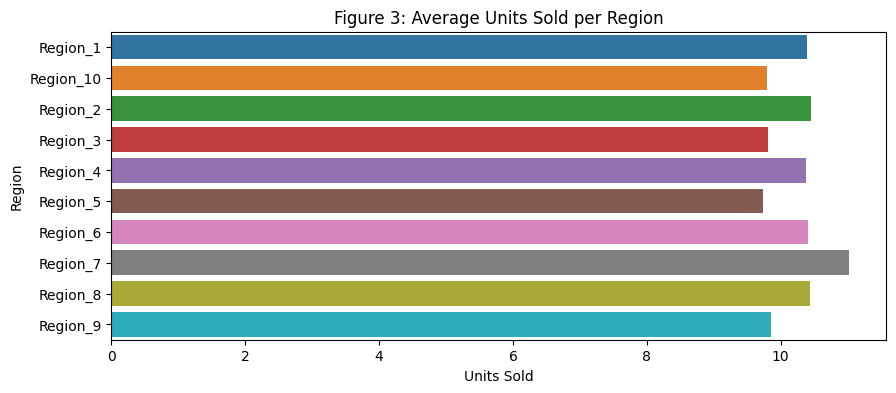

In [210]:
# figure 3

# using figsize so the labels do not overlap
plt.figure(figsize=(10,4))
plt.title("Figure 3: Average Units Sold per Region")
sns.barplot(y=regions['Units Sold'].mean().index, x=regions['Units Sold'].mean())
plt.show()

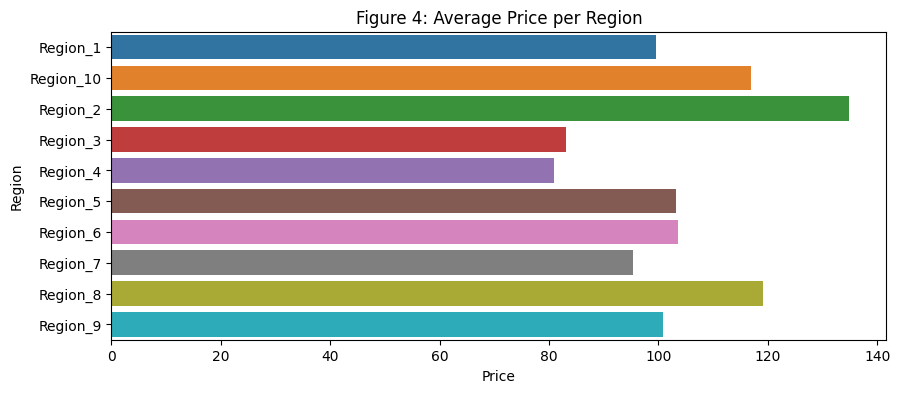

In [211]:
# figure 4

# using figsize so the labels do not overlap
plt.figure(figsize=(10,4))
plt.title("Figure 4: Average Price per Region")
sns.barplot(y=regions['Price'].mean().index, x=regions['Price'].mean())
plt.show()

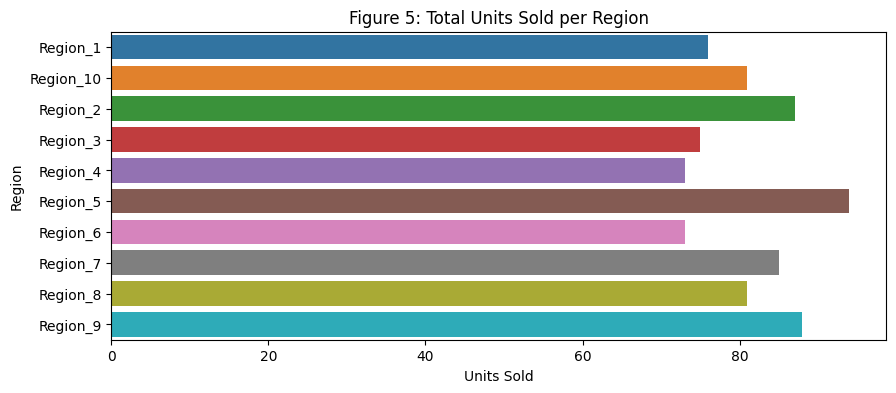

In [212]:
# figure 5

plt.figure(figsize=(10,4))
plt.title("Figure 5: Total Units Sold per Region")
sns.barplot(y=regions['Units Sold'].count().index, x=regions['Units Sold'].count())
plt.show()

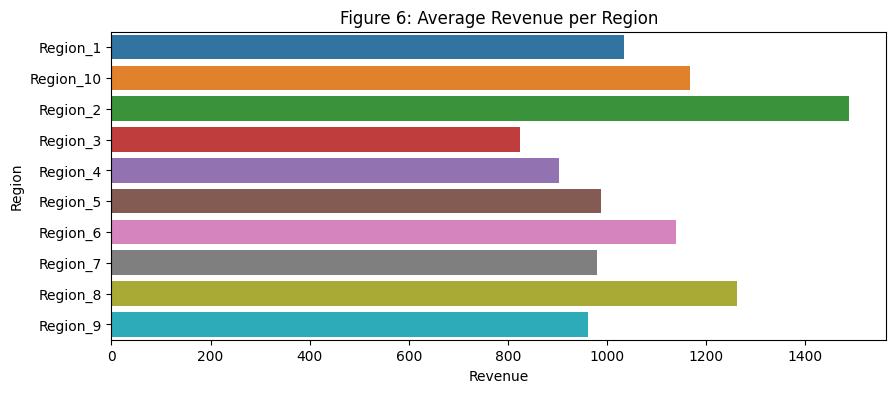

In [213]:
# figure 6

# using figsize so the labels do not overlap
plt.figure(figsize=(10,4))
plt.title("Figure 6: Average Revenue per Region")
sns.barplot(y=regions['revenue'].mean().index, x=regions['revenue'].mean())
plt.xlabel('Revenue')
plt.show()

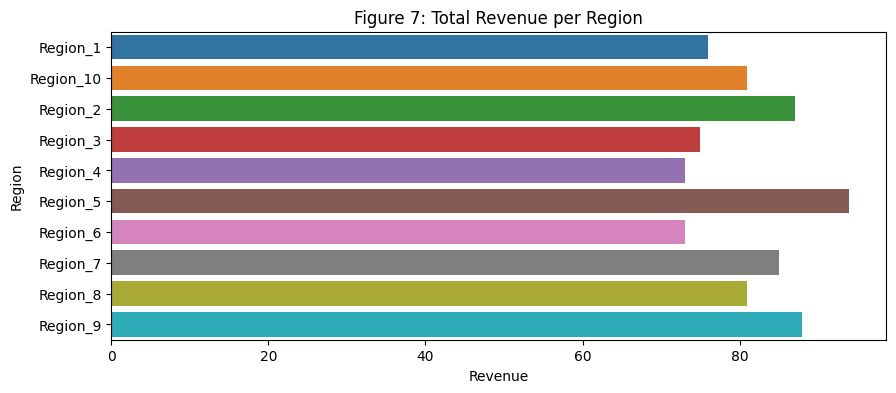

In [214]:
# figure 7

# using figsize so the labels do not overlap
plt.figure(figsize=(10,4))
plt.title("Figure 7: Total Revenue per Region")
sns.barplot(y=regions['revenue'].count().index, x=regions['revenue'].count())
plt.xlabel('Revenue')
plt.show()

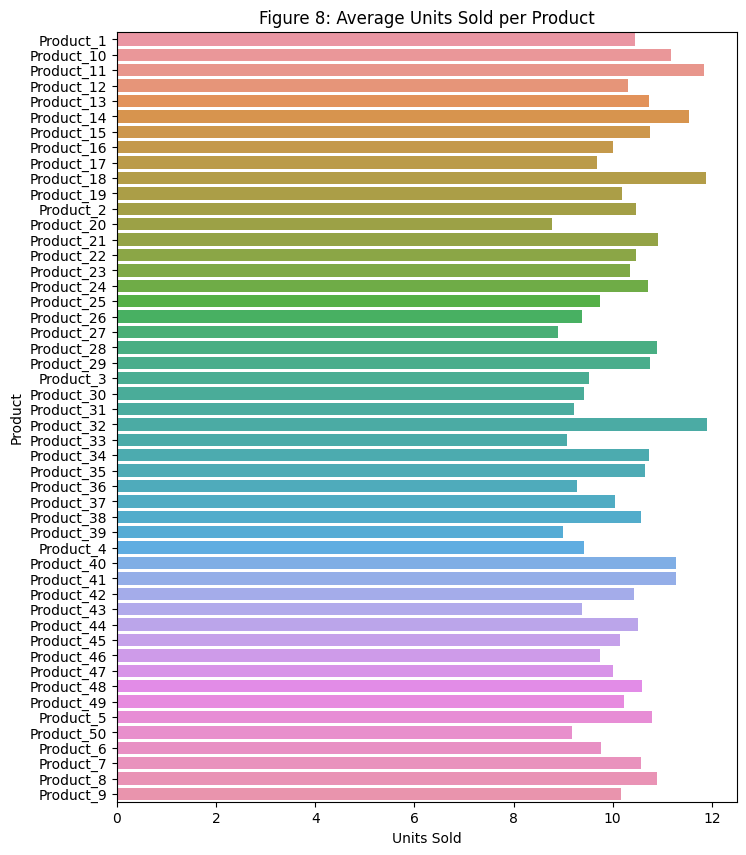

In [215]:
# figure 8

# using figsize so the labels do not overlap
plt.figure(figsize=(8,10))
plt.title("Figure 8: Average Units Sold per Product")
sns.barplot(y=prods['Units Sold'].mean().index, x=prods['Units Sold'].mean())
plt.show()

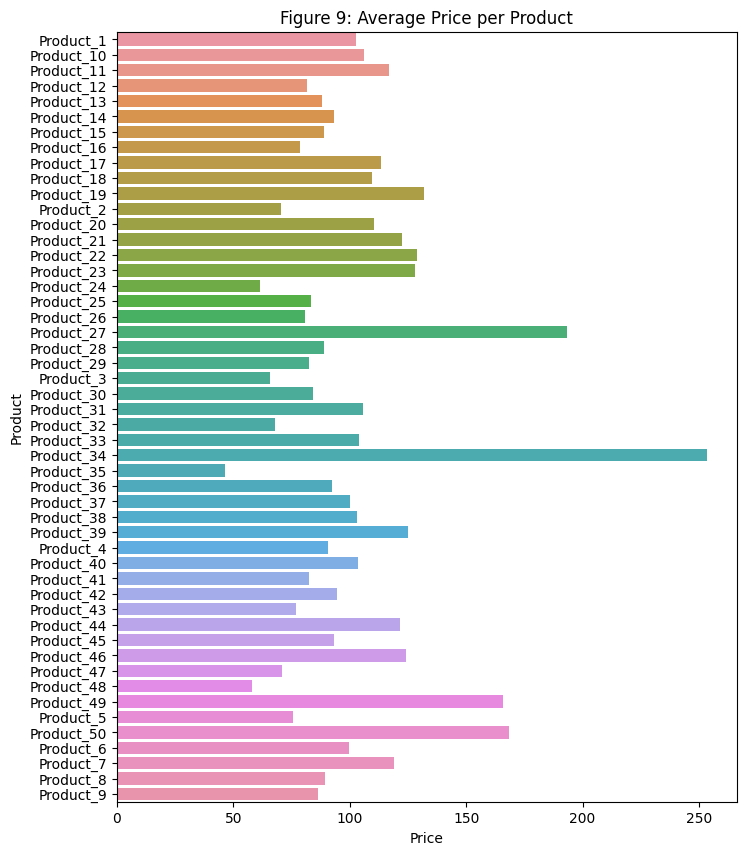

In [216]:
# figure 9

# using figsize so the labels do not overlap
plt.figure(figsize=(8,10))
plt.title("Figure 9: Average Price per Product")
sns.barplot(y=prods['Price'].mean().index, x=prods['Price'].mean())
plt.show()

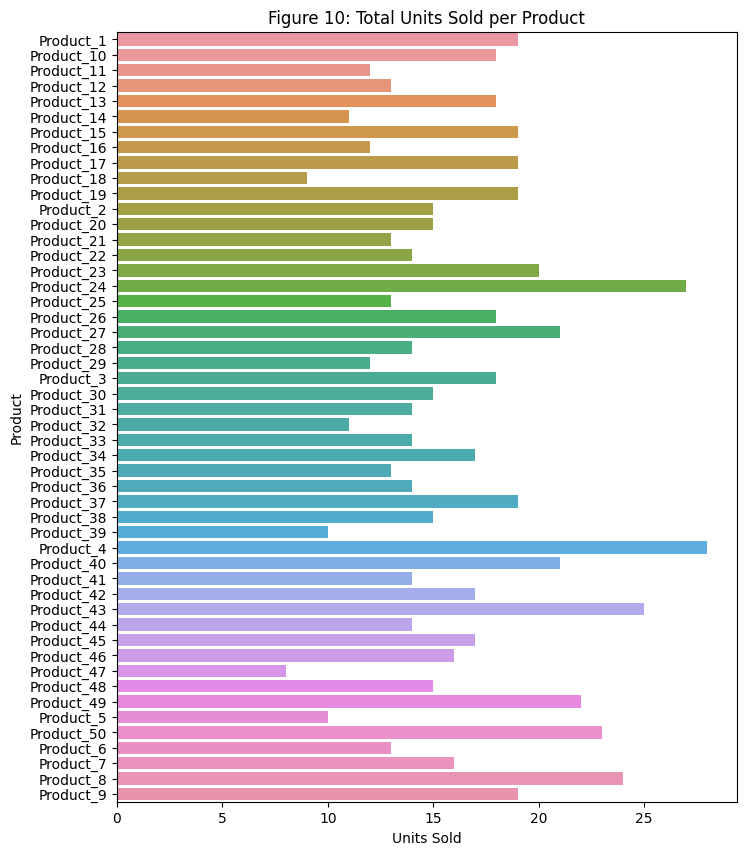

In [217]:
# figure 10

plt.figure(figsize=(8,10))
plt.title("Figure 10: Total Units Sold per Product")
sns.barplot(y=prods['Units Sold'].count().index, x=prods['Units Sold'].count())
plt.show()

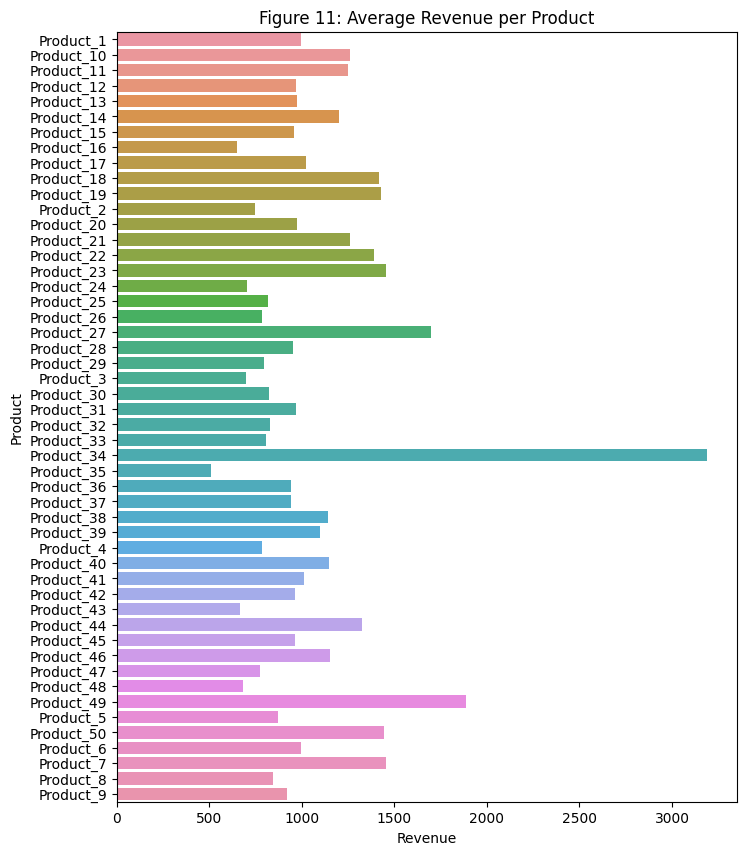

In [218]:
# figure 11

# using figsize so the labels do not overlap
plt.figure(figsize=(8,10))
plt.title("Figure 11: Average Revenue per Product")
sns.barplot(y=prods['revenue'].mean().index, x=prods['revenue'].mean())
plt.xlabel('Revenue')
plt.show()

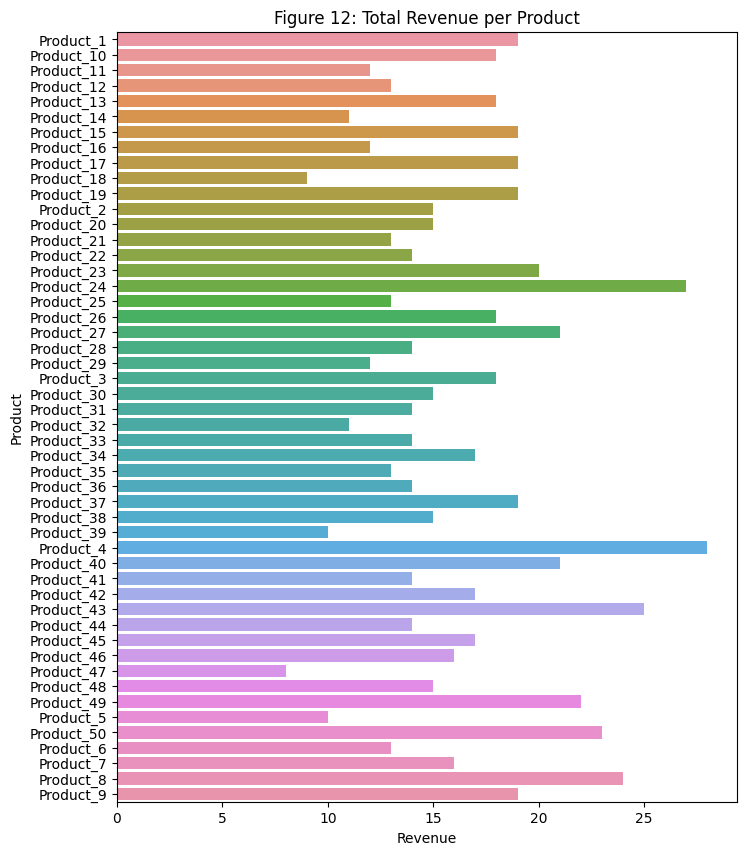

In [219]:
# figure 12

# using figsize so the labels do not overlap
plt.figure(figsize=(8,10))
plt.title("Figure 12: Total Revenue per Product")
sns.barplot(y=prods['revenue'].count().index, x=prods['revenue'].count())
plt.xlabel('Revenue')
plt.show()

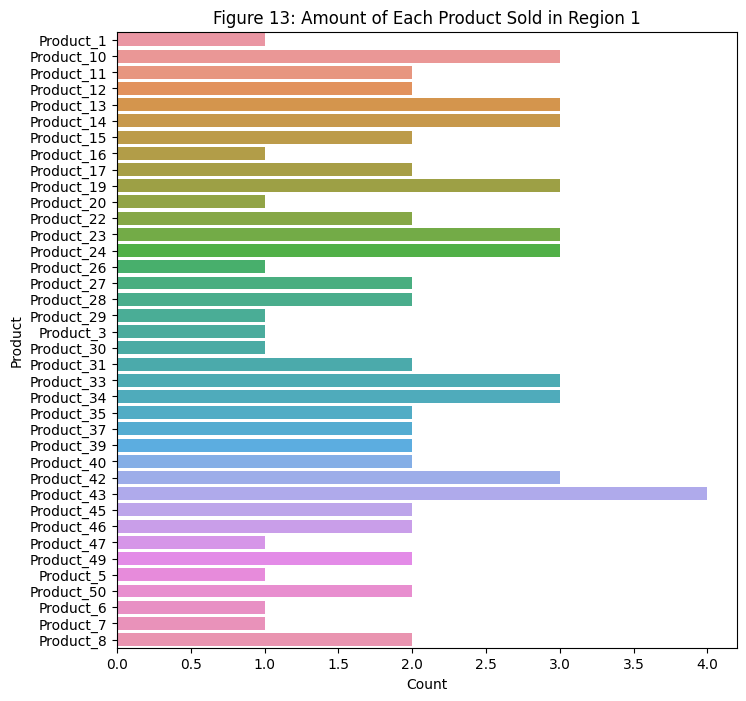

In [220]:
# now figure out how much of each product was sold in each region

# filter only region 1
region1 = data[data["Region"]=="Region_1"]
region1Filtered = region1.groupby('Product')
region1Filtered.count()
# plot
plt.figure(figsize=(8,8))
plt.title("Figure 13: Amount of Each Product Sold in Region 1")
sns.barplot(x=region1Filtered['Sale Date'].count(), y=region1Filtered.count().index)
plt.xlabel("Count")
plt.show()

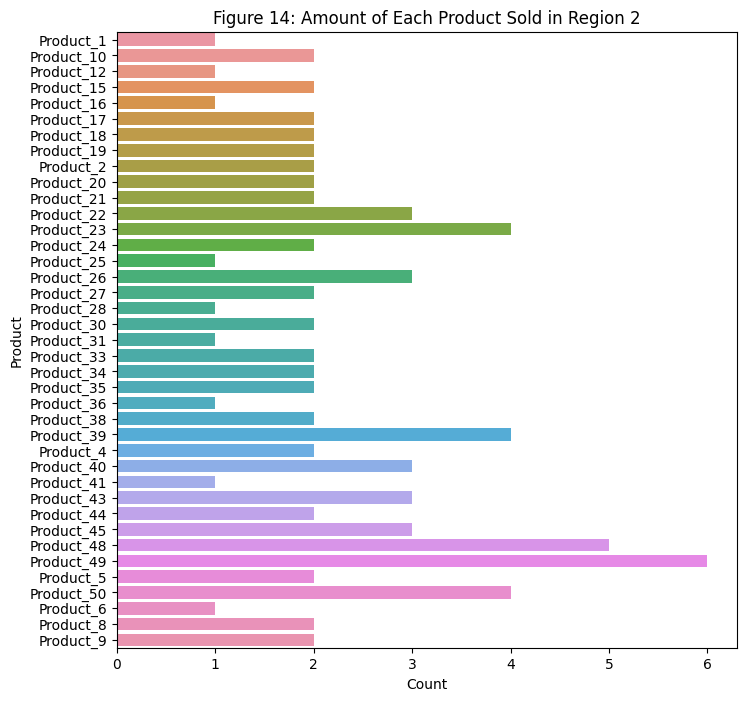

In [221]:
# filter only region 2
region2 = data[data["Region"]=="Region_2"]
region2Filtered = region2.groupby('Product')
region2Filtered.count()
# plot
plt.figure(figsize=(8,8))
plt.title("Figure 14: Amount of Each Product Sold in Region 2")
sns.barplot(x=region2Filtered['Sale Date'].count(), y=region2Filtered.count().index)
plt.xlabel("Count")
plt.show()

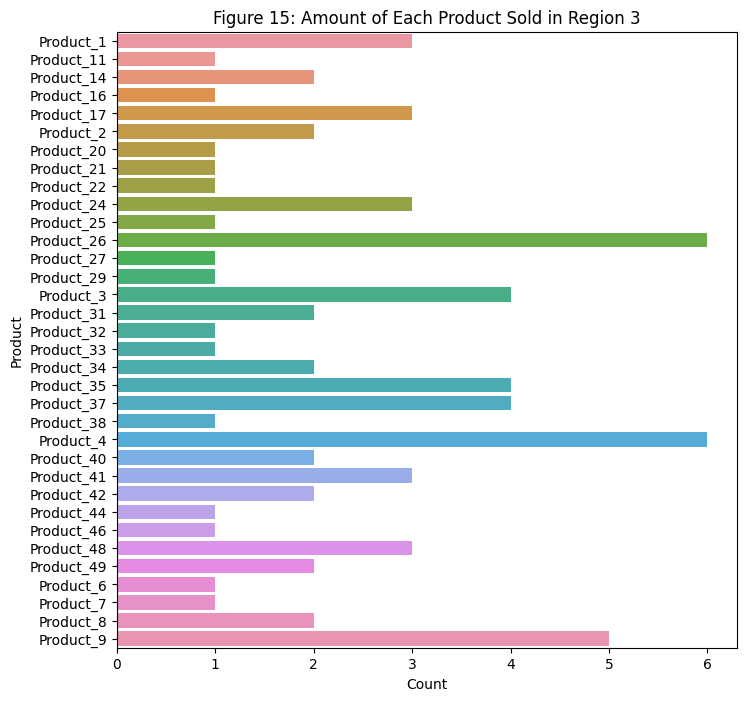

In [222]:
# filter only region 3
region3 = data[data["Region"]=="Region_3"]
region3Filtered = region3.groupby('Product')
region3Filtered.count()
# plot
plt.figure(figsize=(8,8))
plt.title("Figure 15: Amount of Each Product Sold in Region 3")
sns.barplot(x=region3Filtered['Sale Date'].count(), y=region3Filtered.count().index)
plt.xlabel("Count")
plt.show()

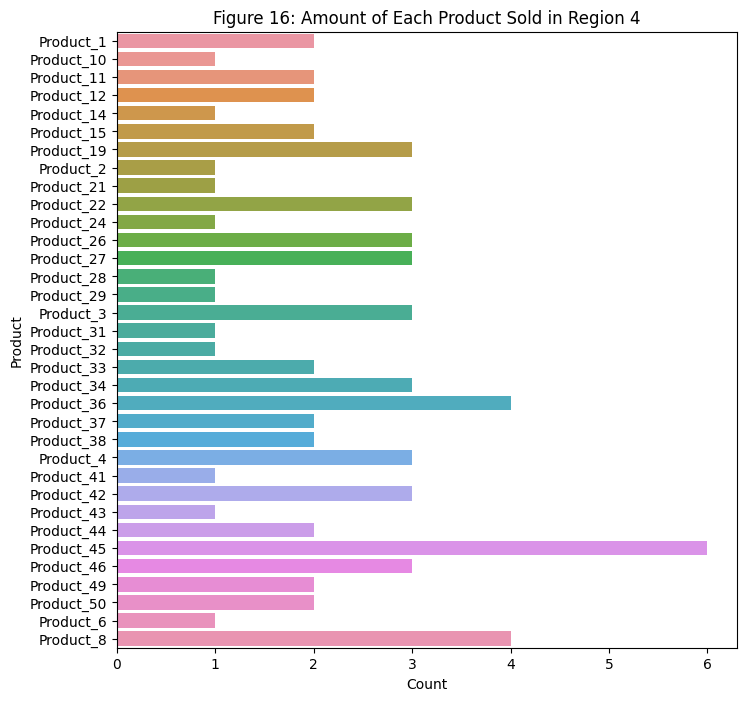

In [223]:
# filter only region 4
region4 = data[data["Region"]=="Region_4"]
region4Filtered = region4.groupby('Product')
region4Filtered.count()
# plot
plt.figure(figsize=(8,8))
plt.title("Figure 16: Amount of Each Product Sold in Region 4")
sns.barplot(x=region4Filtered['Sale Date'].count(), y=region4Filtered.count().index)
plt.xlabel("Count")
plt.show()

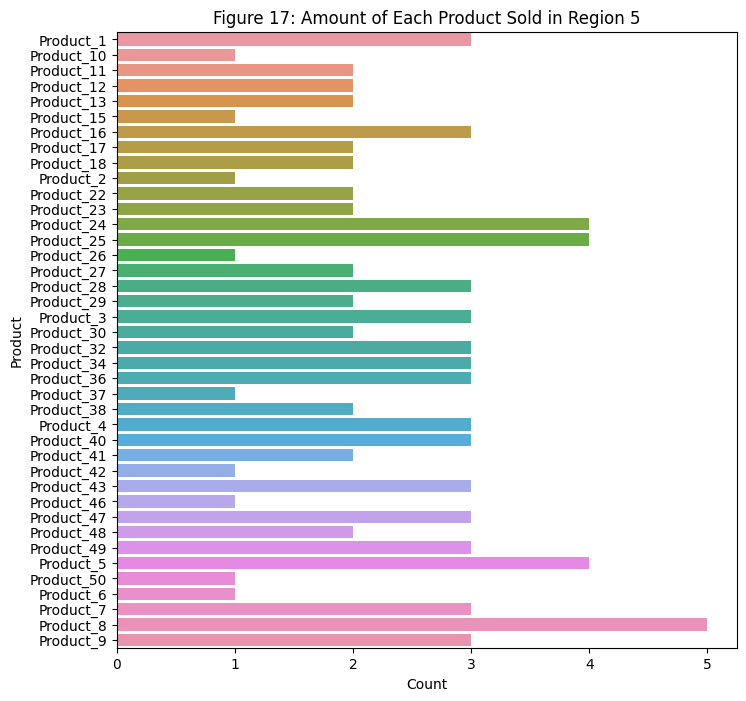

In [224]:
# filter only region 5
region5 = data[data["Region"]=="Region_5"]
region5Filtered = region5.groupby('Product')
region5Filtered.count()
# plot
plt.figure(figsize=(8,8))
plt.title("Figure 17: Amount of Each Product Sold in Region 5")
sns.barplot(x=region5Filtered['Sale Date'].count(), y=region5Filtered.count().index)
plt.xlabel("Count")
plt.show()

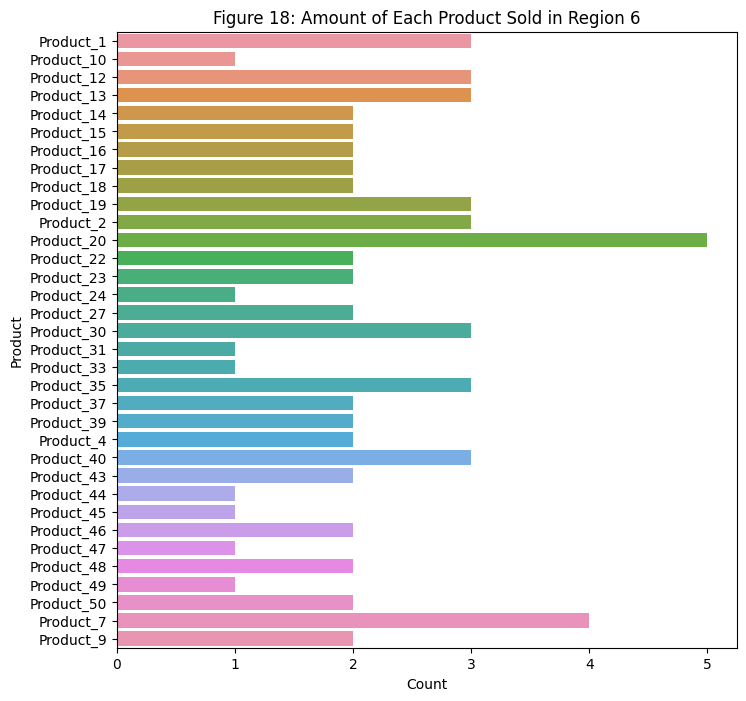

In [225]:
# filter only region 6
region6 = data[data["Region"]=="Region_6"]
region6Filtered = region6.groupby('Product')
region6Filtered.count()
# plot
plt.figure(figsize=(8,8))
plt.title("Figure 18: Amount of Each Product Sold in Region 6")
sns.barplot(x=region6Filtered['Sale Date'].count(), y=region6Filtered.count().index)
plt.xlabel("Count")
plt.show()

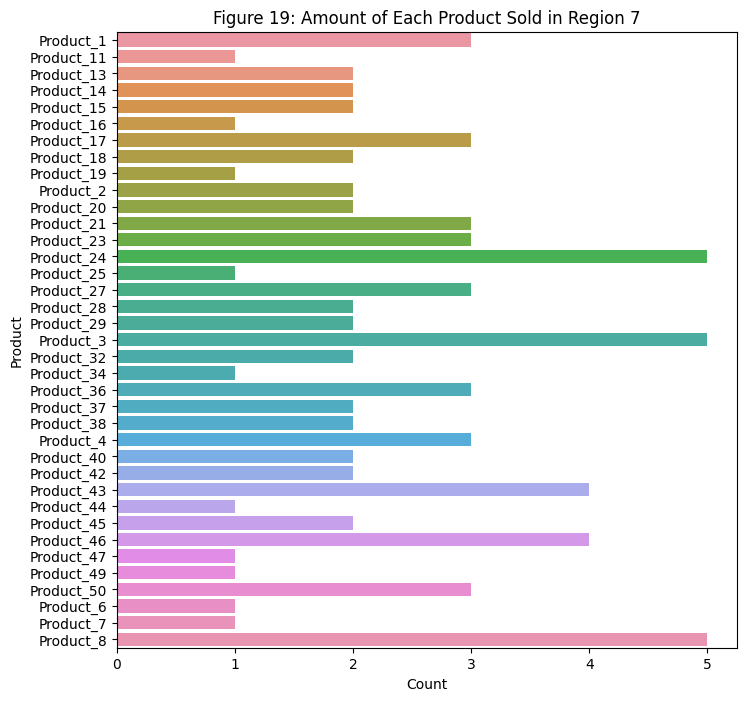

In [226]:
# filter only region 7
region7 = data[data["Region"]=="Region_7"]
region7Filtered = region7.groupby('Product')
region7Filtered.count()
# plot
plt.figure(figsize=(8,8))
plt.title("Figure 19: Amount of Each Product Sold in Region 7")
sns.barplot(x=region7Filtered['Sale Date'].count(), y=region7Filtered.count().index)
plt.xlabel("Count")
plt.show()

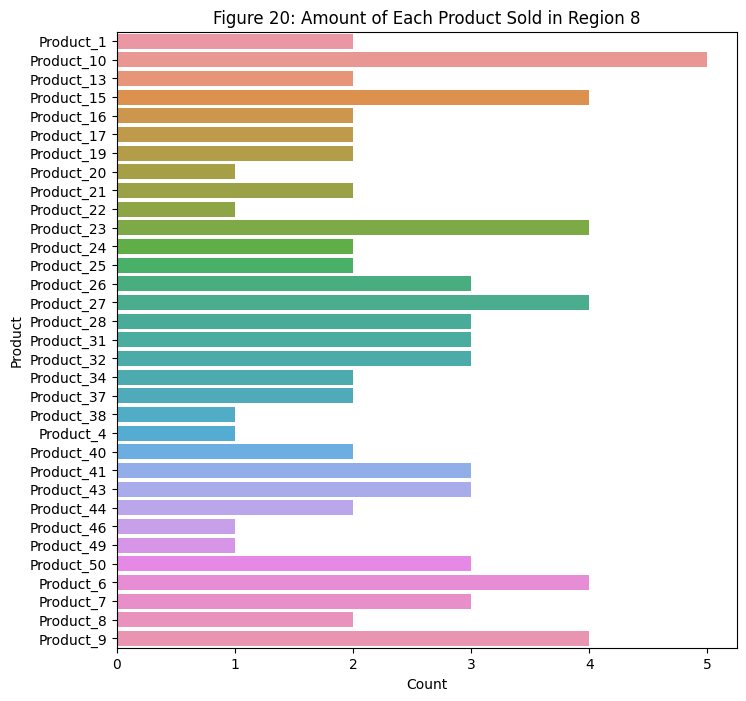

In [227]:
# filter only region 8
region8 = data[data["Region"]=="Region_8"]
region8Filtered = region8.groupby('Product')
region8Filtered.count()
# plot
plt.figure(figsize=(8,8))
plt.title("Figure 20: Amount of Each Product Sold in Region 8")
sns.barplot(x=region8Filtered['Sale Date'].count(), y=region8Filtered.count().index)
plt.xlabel("Count")
plt.show()

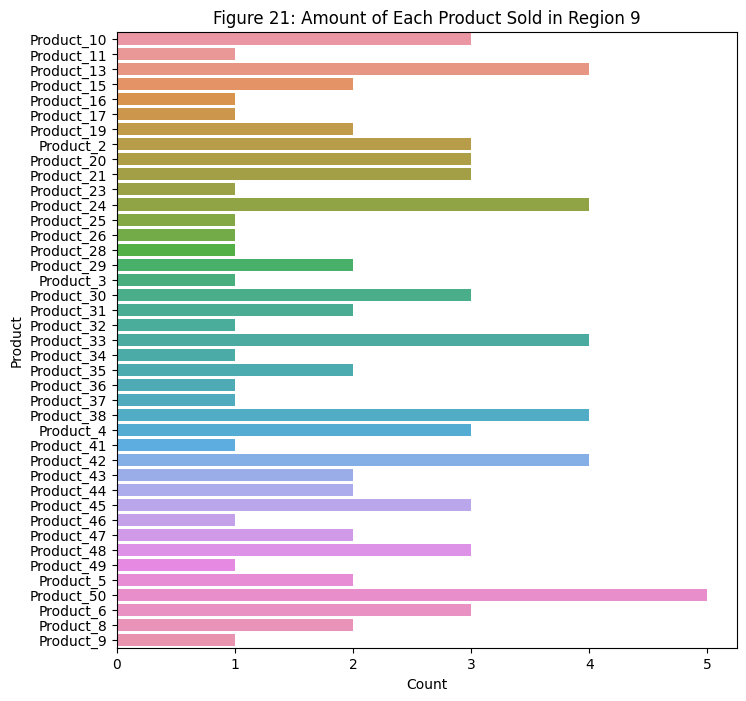

In [228]:
# filter only region 9
region9 = data[data["Region"]=="Region_9"]
region9Filtered = region9.groupby('Product')
region9Filtered.count()
# plot
plt.figure(figsize=(8,8))
plt.title("Figure 21: Amount of Each Product Sold in Region 9")
sns.barplot(x=region9Filtered['Sale Date'].count(), y=region9Filtered.count().index)
plt.xlabel("Count")
plt.show()

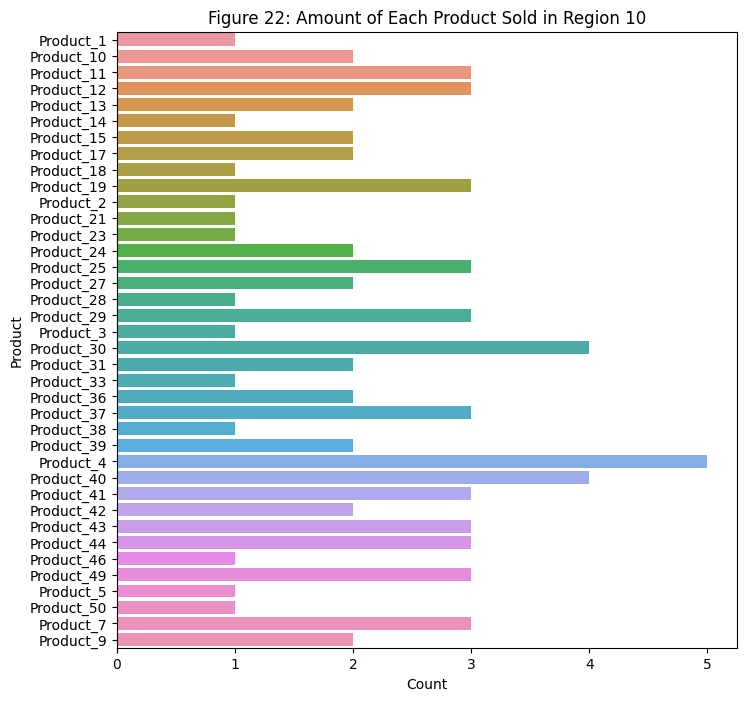

In [229]:
# filter only region 10
region10 = data[data["Region"]=="Region_10"]
region10Filtered = region10.groupby('Product')
region10Filtered.count()
# plot
plt.figure(figsize=(8,8))
plt.title("Figure 22: Amount of Each Product Sold in Region 10")
sns.barplot(x=region10Filtered['Sale Date'].count(), y=region10Filtered.count().index)
plt.xlabel("Count")
plt.show()

# Recommendations (Question 2)

* Assuming the goal of the business is to maximize revenue  

* The business could look at killing products similar to product 39. Products that do not sell in large amounts, do not cost the customer much and do not earn above average amounts of revenue.  

* The business could look at adding more products similar to product 43, essential items. Items that customers buy large amounts of despite them having above average prices. These products consistently generate large amounts of revenue.   

* The business could also add more of these essential products into all regions, especially struggling regions such as regions 3 and 4.   

* The business could increase the number of products it sells that are similar to product 24, cheap products that customers buy in large quantites. These products generate large amounts of revenue.  

* The business should also invest in creating more regions like region 7, regions that sell large amounts of cheap *and* essential products. This combination allows for large amounts of revenue to be generated as customers will buy essential products and likely will also buy cheap products. Regions that sell more expensive products do also generate large amounts of revenue, but are not able to generate as high an average revenue as regions similar to region 7. This is becuase the products that region 7 sells are frequently and regularly bought, providing a steady stream of revenue, whereas a region selling more expensive products would generate large amounts of revenue at irregular intervals.   

  * Of course the success of an individual region may be due to factors not presented in the data. Such as the average salary of customers, or the environment of the region (for example a region selling snow shoes in a cold climate would generate more revenue because snow shoes would be essential).